## Boston Housing :

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 

CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

We can see that the input attributes have a mixture of units.

## Importing Necessary Libs :

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Loading Data set :

In [160]:
df = pd.read_csv('Boston Dataset.csv')

In [161]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* unnamed feature is useless wrt to other features so, deleting this feature.

In [162]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [163]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [164]:
df.shape

(506, 14)

In [165]:
## statstical analysis
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [166]:
## datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


* **No Object type of dataype in our Boston Dataset.**
* **Only Numerical dataypes are present.**
* **so, no need to preprocess any object type of datatype.**

## Unique value of each featured columns

In [167]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
black      357
lstat      455
medv       229
dtype: int64

## Variation of the Target columns

In [168]:
df['medv'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
10%       12.750000
20%       15.300000
30%       18.200000
40%       19.700000
50%       21.200000
60%       22.700000
70%       24.150000
80%       28.200000
90%       34.800000
95%       43.400000
100%      50.000000
max       50.000000
Name: medv, dtype: float64

## Preprocessing the dataset :

In [169]:
## checking nul values

df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

* **No null values are present.**

## Exploratory Data Analysis :

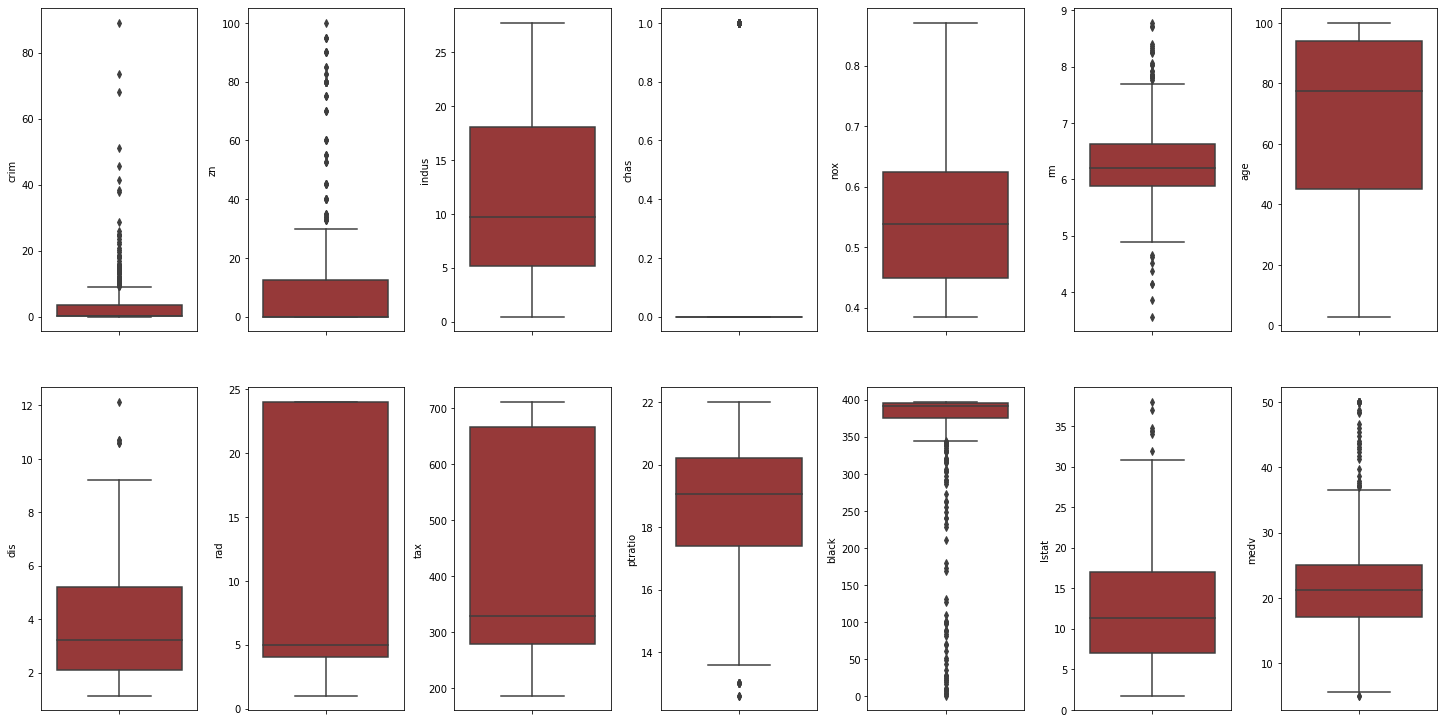

In [170]:
## create box plots

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in df.keys():
    sns.boxplot(y=col, data=df, ax=ax[index], color='brown')
    index += 1
plt.tight_layout(pad=0.5, w_pad=1, h_pad=5)

In [171]:
# Function to detect outliers in every feature

def detect_outliers(dataframe):
    cols = list(df.keys())
    outliers = pd.DataFrame(columns = ['Features', 'Number of outliers'])
    for col in cols:
        if col in df.select_dtypes(include=np.number).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            IQR = q3 - q1
            
            low_fence = q1 - (1.5*IQR)
            up_fence = q3 + (1.5*IQR)
            
            outliers = outliers.append({'Features':col, 'Number of outliers': df.loc[(df[col] < low_fence) | (df[col] > up_fence)].shape[0]}, ignore_index=True)
    return outliers

In [172]:
detect_outliers(df)

,Features,Number of outliers
0,crim,66
1,zn,68
2,indus,0
3,chas,35
4,nox,0
5,rm,30
6,age,0
7,dis,5
8,rad,0
9,tax,0


In [173]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

* **we've to check for outliers.**
* **crim, zn, black, rm have so many outliers**
* **we've to reduce these outliers, inorder to improve accuracy of our models.**

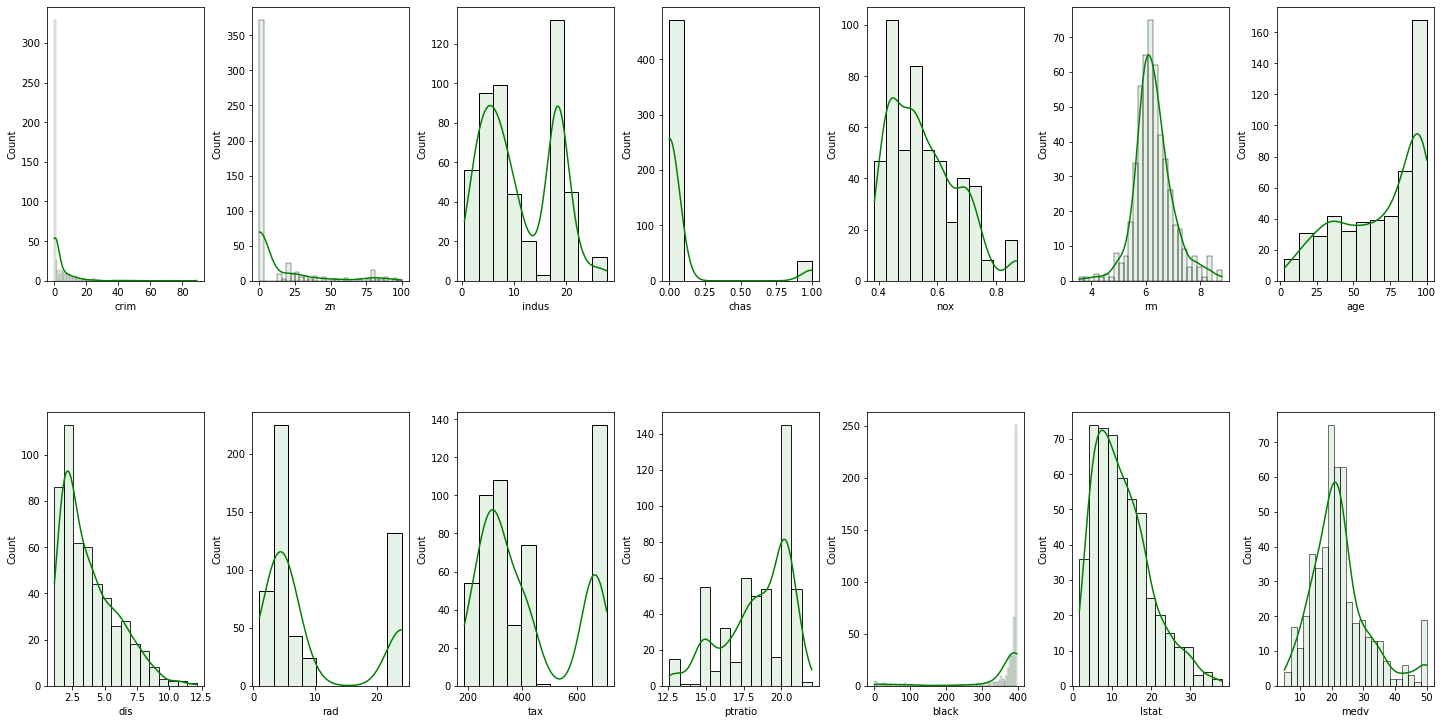

In [174]:
## create dist or hist plots

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in df.keys():
    sns.histplot(x=df[col], ax=ax[index], kde=True, alpha=0.1, color='green')
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=10)

In [175]:
df.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

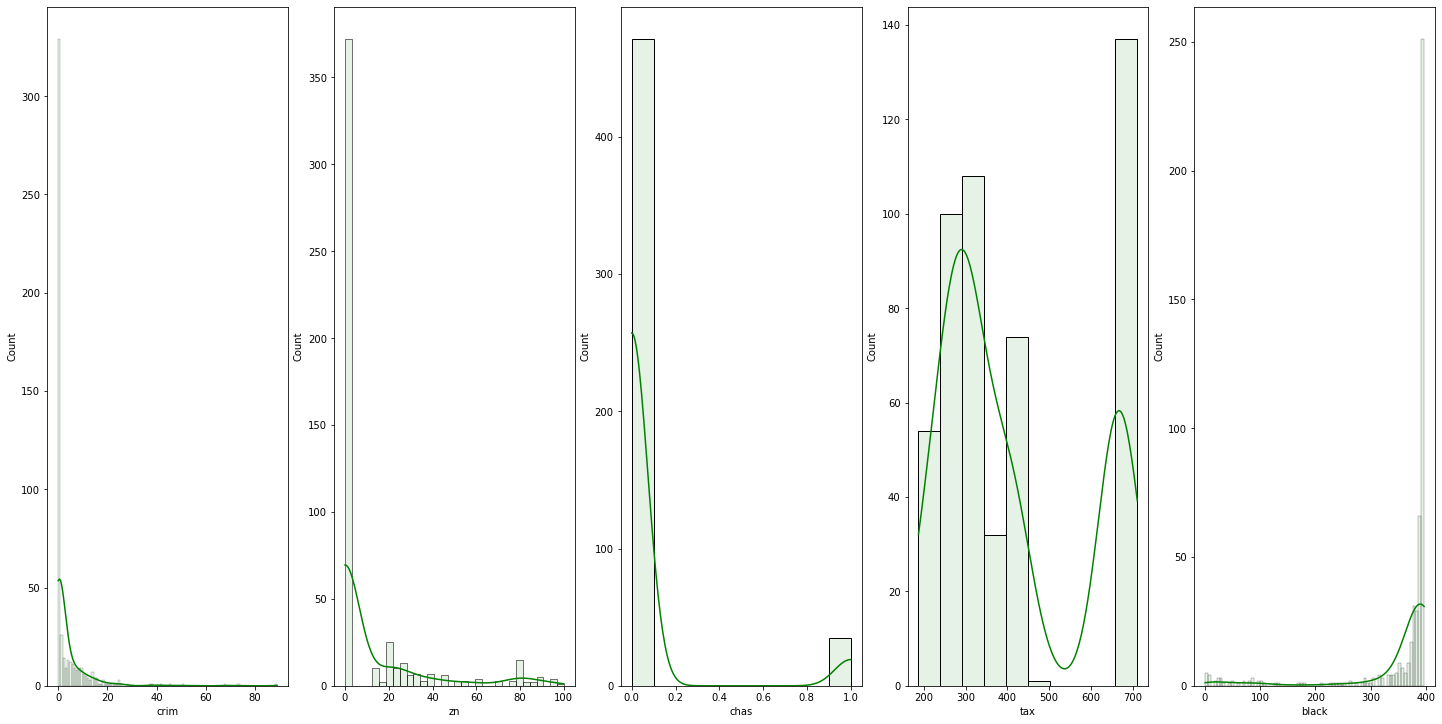

In [176]:
cols = ['crim', 'zn', 'chas', 'tax', 'black']


## create dist or hist plots

fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in cols:
    sns.histplot(x=df[col], ax=ax[index], kde=True, alpha=0.1, color='green')
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=10)

* **we've to check for which features are normally disribution.**
* **medv, lstat, rm forming a normal distribution.**
* **some features have two or more bells which indicates either right skewed or left skewed.**

* **we've to make normalization for some features in order to reduce error or increase accuracy of our model.**
* **crim, zn, chas, tax, black have skewed completely either left or right & also the range is more.**

* **we've to perform min-max normalization on these independant features.**

## min-max Normalization :

* **also known as Normalization.**


* **It will scale the data between 0 and 1. This normalization helps us to understand the data easily.**

In [177]:
cols = ['crim', 'zn', 'chas', 'tax', 'black']

for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
#     min_max_norm formula
    df[col] = (df[col] - minimum) / (maximum - minimum)

In [178]:
# df[cols]

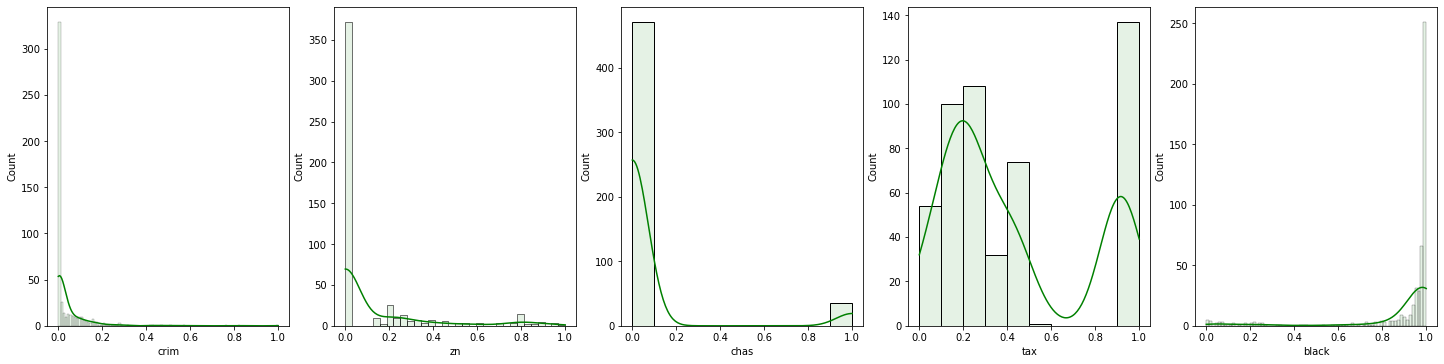

In [179]:
## create dist or hist plots

fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
index = 0
ax = ax.flatten()

for col in cols:
    sns.histplot(x=df[col], ax=ax[index], kde=True, alpha=0.1, color='green')
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=10)

* **tax & black feature has now range starts from 0.**

## Standardization :

* **StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.**



* **StandardScaler results in a distribution with a standard deviation equal to 1.**



* **StandardScaler is useful for the features that follow a Normal distribution.**

In [180]:
from sklearn.preprocessing import StandardScaler
ssclr = StandardScaler()

In [181]:
## fit & transform our required features
scaled_cols =  ssclr.fit_transform(df[cols])
scaled_cols

array([[-0.41978194,  0.28482986, -0.27259857, -0.66660821,  0.44105193],
       [-0.41733926, -0.48772236, -0.27259857, -0.98732948,  0.44105193],
       [-0.41734159, -0.48772236, -0.27259857, -0.98732948,  0.39642699],
       ...,
       [-0.41344658, -0.48772236, -0.27259857, -0.80321172,  0.44105193],
       [-0.40776407, -0.48772236, -0.27259857, -0.80321172,  0.4032249 ],
       [-0.41500016, -0.48772236, -0.27259857, -0.80321172,  0.44105193]])

In [182]:
## assigning to the dataframe

scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,chas,tax,black
0,-0.419782,0.284830,-0.272599,-0.666608,0.441052
1,-0.417339,-0.487722,-0.272599,-0.987329,0.441052
2,-0.417342,-0.487722,-0.272599,-0.987329,0.396427
3,-0.416750,-0.487722,-0.272599,-1.106115,0.416163
4,-0.412482,-0.487722,-0.272599,-1.106115,0.441052


In [183]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,2.31,0.0,0.538,6.575,65.2,4.0900,1,0.208015,15.3,1.000000,4.98,24.0
1,0.000236,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2,0.104962,17.8,1.000000,9.14,21.6
2,0.000236,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2,0.104962,17.8,0.989737,4.03,34.7
3,0.000293,0.00,2.18,0.0,0.458,6.998,45.8,6.0622,3,0.066794,18.7,0.994276,2.94,33.4
4,0.000705,0.00,2.18,0.0,0.458,7.147,54.2,6.0622,3,0.066794,18.7,1.000000,5.33,36.2


In [184]:
## overwriting the records
for col in cols:
    df[col] = scaled_cols[col]

In [185]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,2.31,-0.272599,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,-0.272599,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,-0.272599,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,-0.272599,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,-0.272599,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2


In [186]:
cols

['crim', 'zn', 'chas', 'tax', 'black']

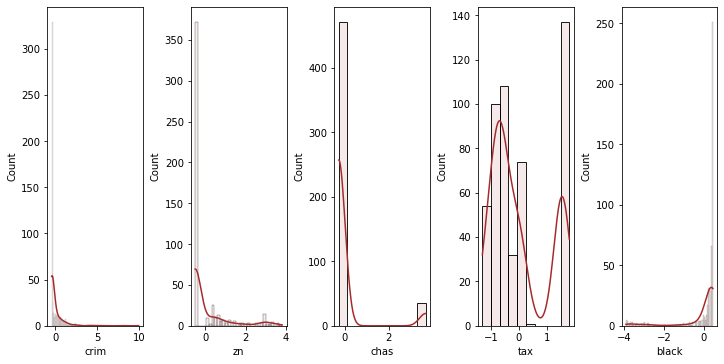

In [187]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(10, 5))
index = 0
ax = ax.flatten()

for col in cols:
    sns.histplot(x=df[col], alpha=0.1, kde=True, color='brown', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

* **some features appears to be unchanged, but this may help in slight increase in accuracy.**

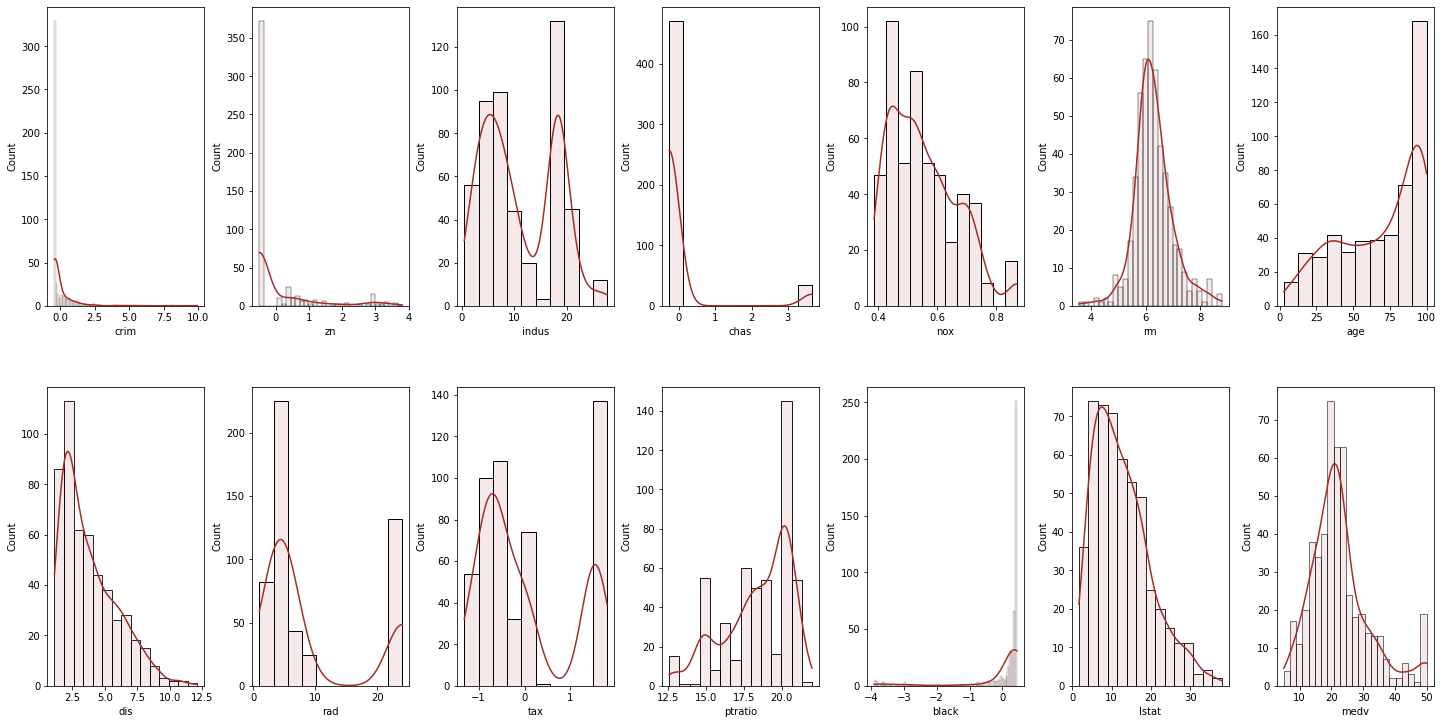

In [188]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in df.keys():
    sns.histplot(x=df[col], alpha=0.1, kde=True, color='brown', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

In [189]:
## pair plots
# sns.pairplot(df);

## Co-relation Matrix :

* **below are some palettes.**

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',

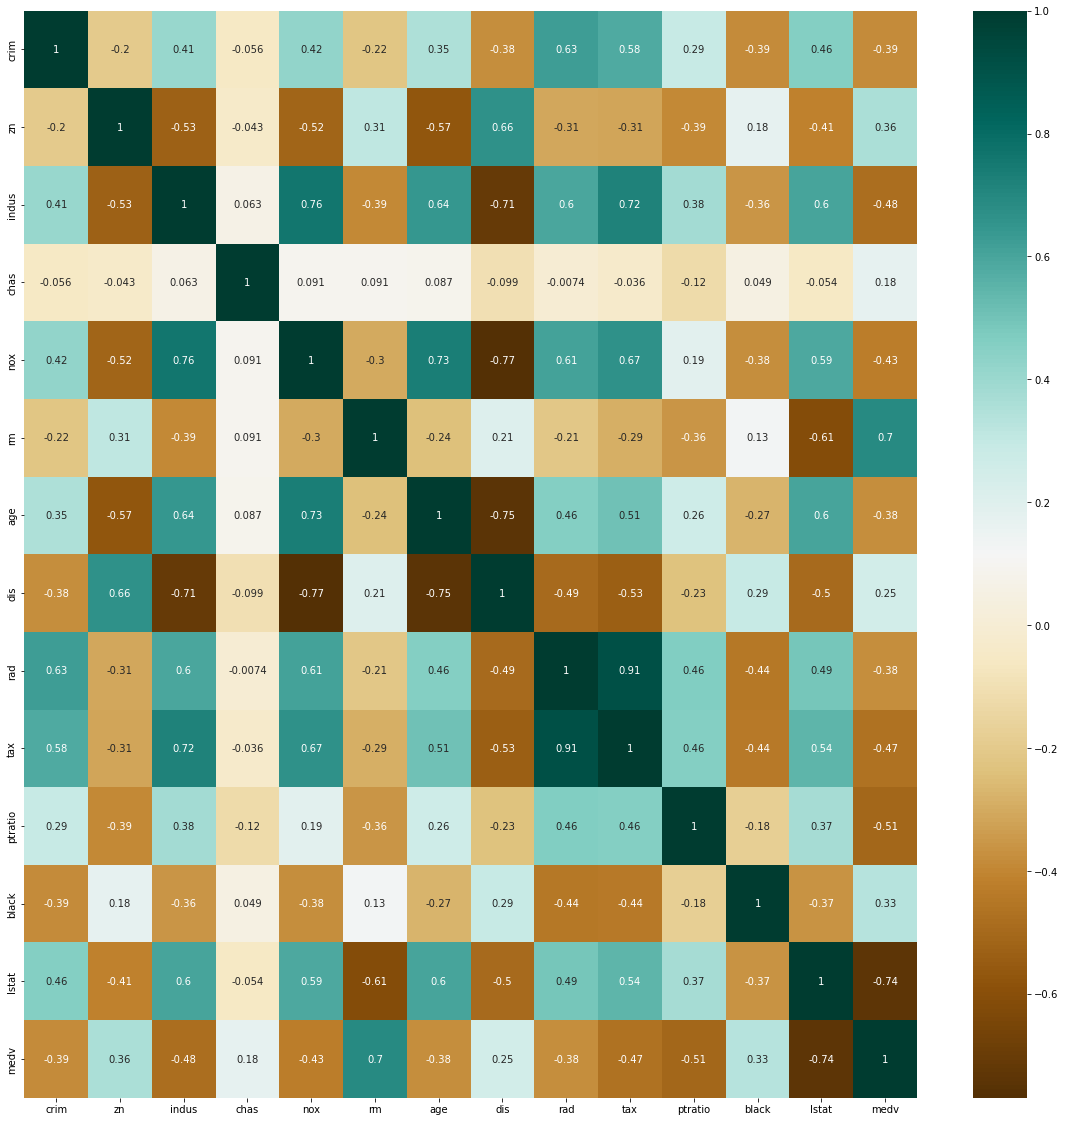

In [190]:
crr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(crr, annot=True, cmap='BrBG');

## Feature Engineering :

In [191]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,2.31,-0.272599,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,-0.272599,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,-0.272599,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,-0.272599,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,-0.272599,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2


* **chas feature has more zeros than one & it is not usefull for our model to predict better accuracy so, drop chas feature.**

In [202]:
X = df.drop(['medv', 'chas'], axis=1)
y = df['medv']

In [203]:
X.shape, y.shape

((506, 12), (506,))

## Model Training :

In [229]:
r2score = []
adj_r2score = []

def train_model(model, X, y):
    
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    # training
    model.fit(X_train, y_train)
    
    # predicting
    y_pred = model.predict(X_test)
    
    # cv score
    cv_score = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    # model report
#     print('\n\n')
    print('Model Report :')
    print('\n\n')
    print('MSE  :', mean_squared_error(y_test, y_pred))
    print("MAE  :", mean_absolute_error(y_test, y_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')
    print('CV Score :', cv_score)
    print('\n')
    
    
    r2s = r2_score(y_test, y_pred)
    adj_r2s = 1 - (1 - r2s)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print('R2 score :', r2s)
    print('Adjusted R2 score :', adj_r2s)
    
    r2score.append(r2s)
    adj_r2score.append(adj_r2s)
    
    print('\n')
    
    
    # visualize the difference between the actual and predicted price
    print('Visualize the difference between the actual and predicted price :')
#     print('Predicted Vs Prices :')
    plt.scatter(y_test, y_pred)
    plt.xlabel("Price")
    plt.ylabel("Predicted Price")
    plt.title("Predicted Vs Prices")
    plt.show()
    
    print('\n')
    
    print('Residual Vs Predicted Prices : ')
    residual = y_test - y_pred
    plt.scatter(y_pred, residual)
    plt.xlabel("Prediced price")
    plt.ylabel("Residual values")
    plt.title("Residual Vs Predicted Prices")
    plt.show()
    
    print('\n')
    
    # Checking for the Normality Errors
    print('Normality Assumptions :')
    sns.histplot(residual, kde=True, alpha=0.3)
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.title("Histogram of residula")
    plt.show()

## Model Evaluation :

### R-squared
>R-squared = (TSS-RSS)/TSS

                = Explained variation/ Total variation

                = 1 – Unexplained variation/ Total variation
**A higher R-squared value indicates a higher amount of variability being explained by our model and vice-versa. If we had a really low RSS value, it would mean that the regression line was very close to the actual points. high RSS value, it would mean that the regression line was far away from the actual points. independent variables fail to explain the majority of variation in the target variable. Give us a really low R-squared value.**

### Problems with R-squared statistic
* The R-squared statistic isn’t perfect. In fact, it suffers from a major flaw. Its value never decreases no matter the number of variables we add to our regression model.
* That is, even if we are adding redundant variables to the data, the value of R-squared does not decrease.
* It either remains the same or increases with the addition of new independent variables.
* This clearly does not make sense because some of the independent variables might not be useful in determining the target variable. 



### Adjusted R-squared statistic

>Adj_R_Squared = 1 - [ (1 - R2)(n - 1) / (n - k - 1) ] 

* N is the number of points in your data sample.
* K is the number of independent regressors, i.e. the number of variables in your model, excluding the constant.


* The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable.
* In doing so, we can determine whether adding new variables to the model actually increases the model fit.
* if R-squared does not increase significantly on the addition of a new independent variable, then the value of Adjusted R-squared will actually decrease.
* On the other hand, if on adding the new independent variable we see a significant increase in R-squared value, then the Adjusted R-squared value will also increas

### Normality Assumptions :

**Normality of errors:**

* The residuals must be approximately normally distributed. the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


* Due to the `Central Limit Theorem`, we may assume that there are lots of underlying facts affecting the process and the sum of these individual errors will tend to behave like in a `zero mean normal distribution`.

### Linear Regression :

Model Report :



MSE  : 21.697160127874888
MAE  : 3.20432567965018
RMSE : 4.65802105275136


CV Score : 30.433703169224327


R2 score : 0.7088141357902253
Adjusted R2 score : 0.6836757878008923


Visualize the difference between the actual and predicted price :


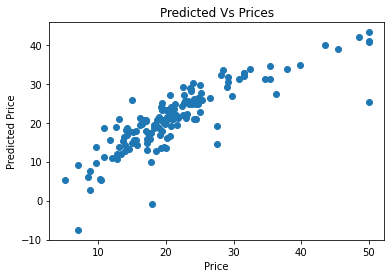



Residual Vs Predicted Prices : 


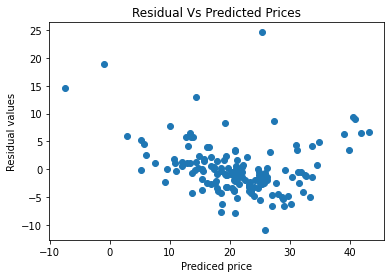



Normality Assumptions :


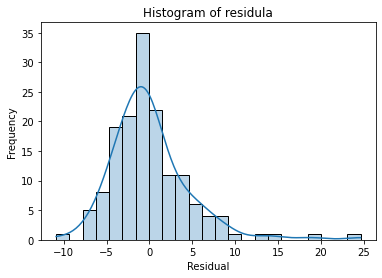

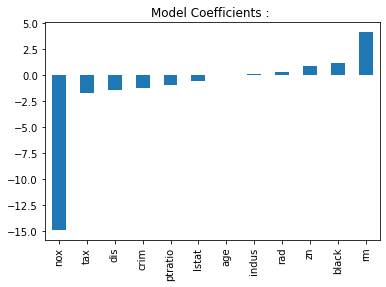

In [230]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

train_model(model, X, y)

# coefficients
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients : ');

 * **Errors are normally distributed . Hence Normality Assumption is satisfied.**

* **Lesser the cv score better the model**

### Ridge Regression :

Model Report :



MSE  : 21.766736568237107
MAE  : 3.206663116573339
RMSE : 4.665483529950257


CV Score : 30.06964702581103


R2 score : 0.707880387972718
Adjusted R2 score : 0.6826614286610102


Visualize the difference between the actual and predicted price :


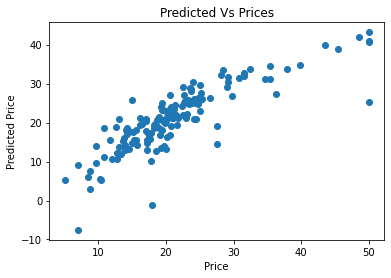



Residual Vs Predicted Prices : 


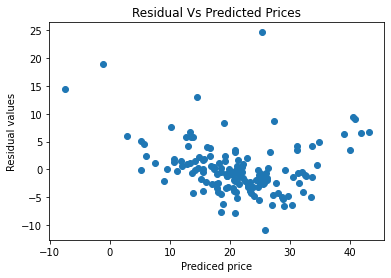



Normality Assumptions :


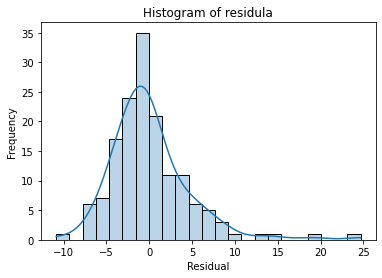

<AxesSubplot:title={'center':'Model COefficients :'}>

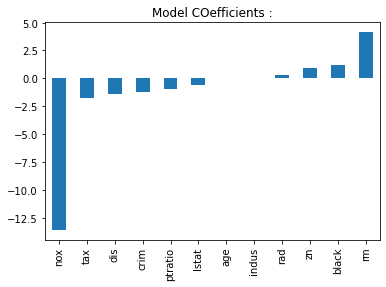

In [231]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)

train_model(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model COefficients :')

 * **Errors are normally distributed . Hence Normality Assumption is satisfied.**

### Lasso Regression :

Model Report :



MSE  : 21.91349714403882
MAE  : 3.2134554932598944
RMSE : 4.68118544217582


CV Score : 30.285559552050632


R2 score : 0.7059107935721196
Adjusted R2 score : 0.6805217973337414


Visualize the difference between the actual and predicted price :


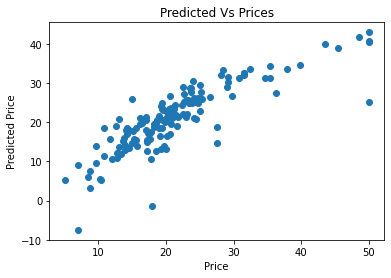



Residual Vs Predicted Prices : 


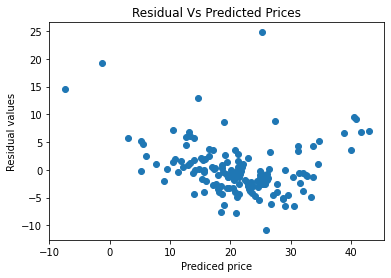



Normality Assumptions :


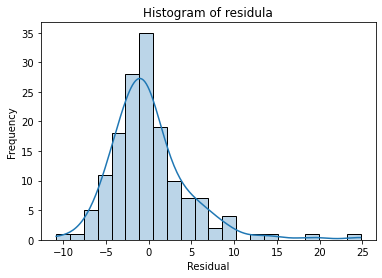

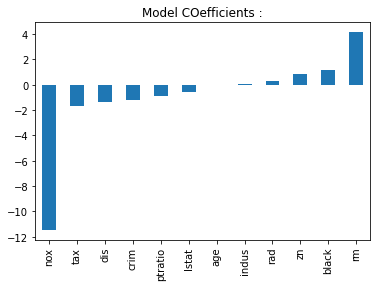

In [234]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)

train_model(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model COefficients :');

 * **Errors are normally distributed . Hence Normality Assumption is satisfied.**

### Decision Tree :

Model Report :



MSE  : 18.657105263157895
MAE  : 2.6697368421052636
RMSE : 4.319387139763915


CV Score : 20.645083870967746


R2 score : 0.7496130697433597
Adjusted R2 score : 0.7279969318794771


Visualize the difference between the actual and predicted price :


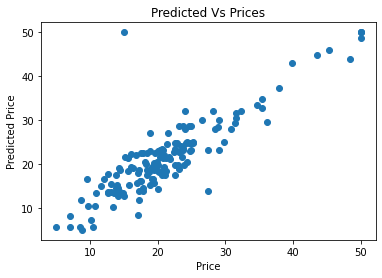



Residual Vs Predicted Prices : 


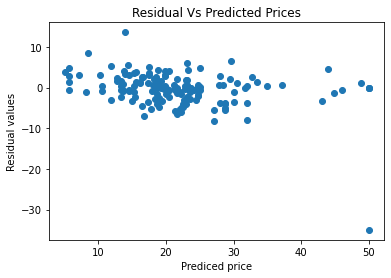



Normality Assumptions :


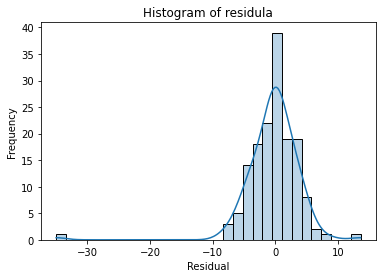

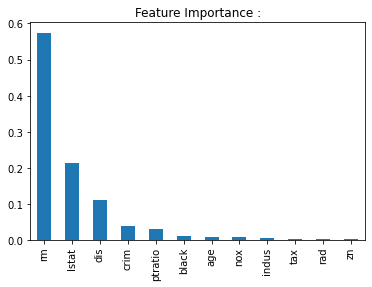

In [235]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

train_model(model, X, y)
feat_imp = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance :');

 * **Errors are normally distributed . Hence Normality Assumption is satisfied.**

### Random Forest :

Model Report :



MSE  : 9.704709263157898
MAE  : 2.1366184210526313
RMSE : 3.1152382353774963


CV Score : 16.382554682150545


R2 score : 0.8697583399374573
Adjusted R2 score : 0.8585144556155112


Visualize the difference between the actual and predicted price :


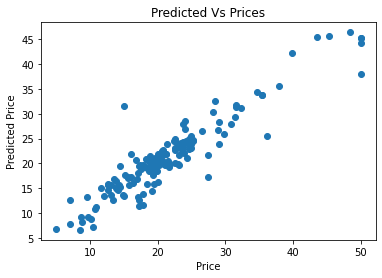



Residual Vs Predicted Prices : 


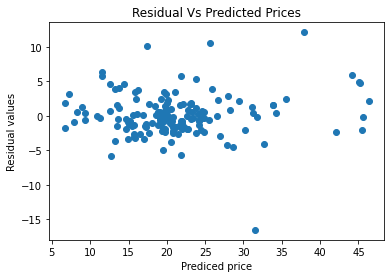



Normality Assumptions :


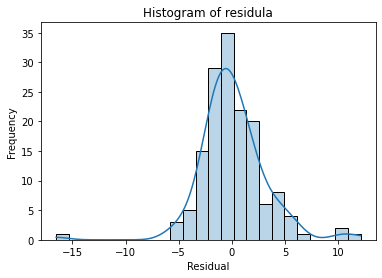

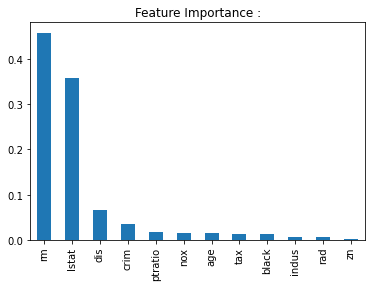

In [237]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

train_model(model, X, y)
feat_imp = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance :');

 * **Errors are normally distributed . Hence Normality Assumption is satisfied.**

### Extra Tree Regressor :

Model Report :



MSE  : 8.24743232236842
MAE  : 1.9306118421052623
RMSE : 2.871834313181807


CV Score : 16.736354872688175


R2 score : 0.8893156664675593
Adjusted R2 score : 0.8797601844359817


Visualize the difference between the actual and predicted price :


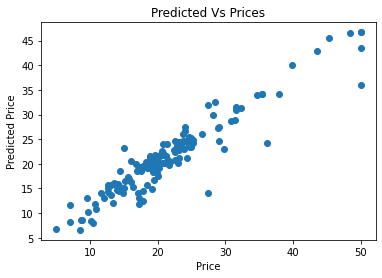



Residual Vs Predicted Prices : 


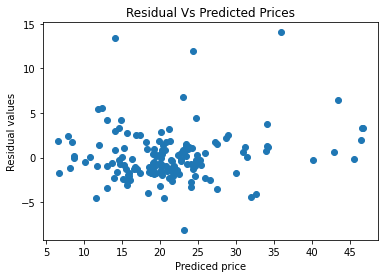



Normality Assumptions :


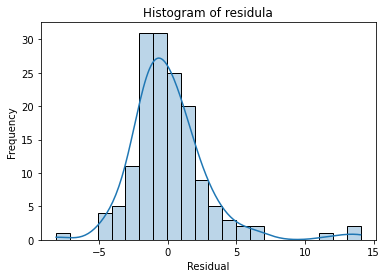

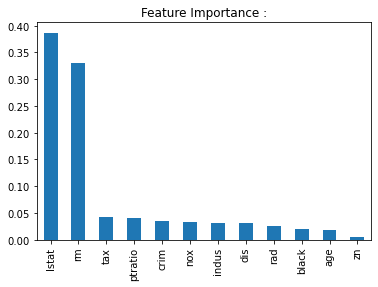

In [238]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

train_model(model, X, y)
feat_imp = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance :');

 * **Errors are normally distributed . Hence Normality Assumption is satisfied.**

### XG_Boost :

Model Report :



MSE  : 8.96010553024766
MAE  : 2.051218426854987
RMSE : 2.9933435369579047


CV Score : 16.81020722509732


R2 score : 0.8797512643655137
Adjusted R2 score : 0.8693700785553422


Visualize the difference between the actual and predicted price :


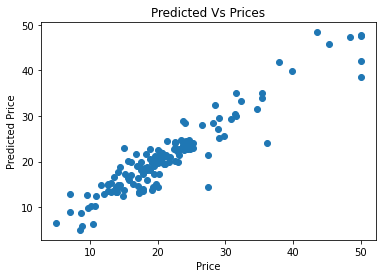



Residual Vs Predicted Prices : 


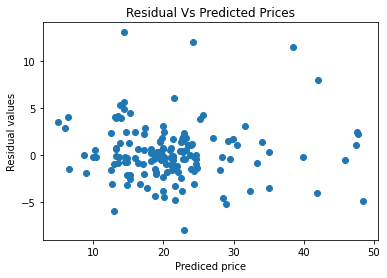



Normality Assumptions :


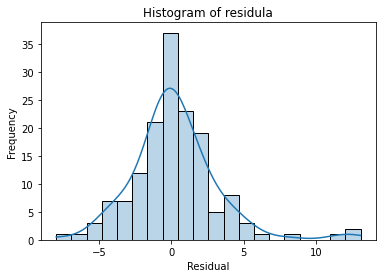

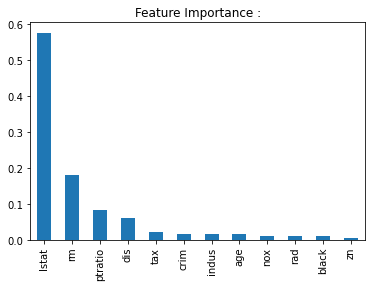

In [239]:
import xgboost as xgb
model = xgb.XGBRegressor()

train_model(model, X, y)
feat_imp = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importance :');

 * **Errors are normally distributed . Hence Normality Assumption is satisfied.**

## Evaluation Comparisoon of the all model :

In [241]:
models = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Extra Tree Regressor', 'XGBoost']

models = pd.DataFrame({'model': models, 'R2 Score': r2score, 'Adjusted R2 SCore': adj_r2score})

In [242]:
models.sort_values(by='R2 Score', ascending=False)

,model,R2 Score,Adjusted R2 SCore
5,Extra Tree Regressor,0.889316,0.879760
6,XGBoost,0.879751,0.869370
4,Random Forest,0.869758,0.858514
3,Decision Tree,0.749613,0.727997
0,Linear Regression,0.708814,0.683676
1,Ridge,0.707880,0.682661
2,Lasso,0.705911,0.680522


## Conclusion :

* XGBoost : XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.


* XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.


* Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time.


* One of the biggest advantages of random forest is its versatility. It can be used for both regression and classification tasks


* Random forest is also a very handy algorithm because the default hyperparameters it uses often produce a good prediction result.



* Extra tree Regressor performs well for this data.


* All the 1st three Models performs well & used commonly.